#### Dependencies importing

In [2]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [3]:
### TBE 
# Data Science
import pandas as pd
import numpy as np
import itertools


In [4]:
# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
### TBE
# Modeling
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pickle

# COVID-19 Mortality Prediction with Support Vector Regression Model

## The case of Brazil country

### Country setting

In [6]:
### TBE
country = 'Brazil'

## Data loading

### Country index CSV reading

In [7]:
### TBE
data_index=pd.read_csv(get_csv_out_path(f'index_{country}.csv'))
print('data_index.shape', data_index.shape)

data_index.shape (909, 13)


In [8]:
data_index.tail()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
904,2022-09-07,0.0,0.0,0.0,34477539.0,0.0,684425.0,0.0,0.062191,470910315.0,186624508.0,171811546.0,117900233.0
905,2022-09-08,0.0,0.0,0.0,34477539.0,0.0,684425.0,0.0,0.062191,470943250.0,186632925.0,171821267.0,117915066.0
906,2022-09-09,0.0,0.0,0.0,34516739.0,39200.0,684813.0,388.0,0.062191,471130593.0,186656503.0,171858625.0,118041839.0
907,2022-09-10,0.0,0.0,0.0,34516739.0,0.0,684813.0,0.0,0.062191,471187373.0,186663841.0,171871796.0,118078226.0
908,2022-09-11,0.0,0.0,0.0,34516739.0,0.0,684813.0,0.0,0.062191,471204985.0,186665783.0,171875292.0,118090435.0


## Data preprocessing

### Date index setting

In [9]:
### TBE
data_index=data_index.set_index('date')
print('data_index.shape', data_index.shape)

data_index.shape (909, 12)


In [10]:
data_index

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,
2020-03-17,0.082695,0.114918,0.142755,321.0,121.0,1.0,1.0,0.084753,0.0,0.0,0.0,0.0
2020-03-18,0.086331,0.120439,0.142755,372.0,51.0,3.0,2.0,0.088184,0.0,0.0,0.0,0.0
2020-03-19,0.093624,0.131460,0.142755,621.0,249.0,6.0,3.0,0.095067,0.0,0.0,0.0,0.0
2020-03-20,0.093624,0.131460,0.142755,793.0,172.0,11.0,5.0,0.095067,0.0,0.0,0.0,0.0
2020-03-21,0.105800,0.142501,0.142755,1021.0,228.0,15.0,4.0,0.106525,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,0.000000,0.000000,0.000000,34477539.0,0.0,684425.0,0.0,0.062191,470910315.0,186624508.0,171811546.0,117900233.0
2022-09-08,0.000000,0.000000,0.000000,34477539.0,0.0,684425.0,0.0,0.062191,470943250.0,186632925.0,171821267.0,117915066.0
2022-09-09,0.000000,0.000000,0.000000,34516739.0,39200.0,684813.0,388.0,0.062191,471130593.0,186656503.0,171858625.0,118041839.0


### `n_days` number of days of prediction setting

In [11]:
### TBE
n_days = 10

### Time Series next `n_days` days shifting

In [12]:
### TBE 
# Next `n_days` timeseries shifting
for n in range(1, n_days + 1):
    data_index[f'day-{n}']=data_index['total_deaths'].shift(periods=n)
    
# Data `n_days` first time series truncking
data_index = data_index.iloc[n_days: , :]
print('data_index.shape', data_index.shape)

data_index.shape (899, 22)


In [13]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.113093,0.148022,0.142755,3417.0,432.0,92.0,15.0,0.113386,0.0,0.0,...,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0,1.0
2020-03-28,0.113093,0.148022,0.142755,3904.0,487.0,111.0,19.0,0.113386,0.0,0.0,...,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0
2020-03-29,0.113093,0.148022,0.142755,4256.0,352.0,136.0,25.0,0.113386,0.0,0.0,...,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0
2020-03-30,0.113093,0.148022,0.142755,4579.0,323.0,159.0,23.0,0.113386,0.0,0.0,...,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0
2020-03-31,0.113093,0.148022,0.142755,5717.0,1138.0,201.0,42.0,0.113386,0.0,0.0,...,159.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0


### NA data filling

In [14]:
### TBE
# NA data filling
data_index=data_index.fillna(0)

In [15]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.113093,0.148022,0.142755,3417.0,432.0,92.0,15.0,0.113386,0.0,0.0,...,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0,1.0
2020-03-28,0.113093,0.148022,0.142755,3904.0,487.0,111.0,19.0,0.113386,0.0,0.0,...,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0
2020-03-29,0.113093,0.148022,0.142755,4256.0,352.0,136.0,25.0,0.113386,0.0,0.0,...,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0
2020-03-30,0.113093,0.148022,0.142755,4579.0,323.0,159.0,23.0,0.113386,0.0,0.0,...,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0
2020-03-31,0.113093,0.148022,0.142755,5717.0,1138.0,201.0,42.0,0.113386,0.0,0.0,...,159.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0


## Data Visualizing

### Number of new death cases over time for Brazil country

Text(0.5, 0, 'Date')

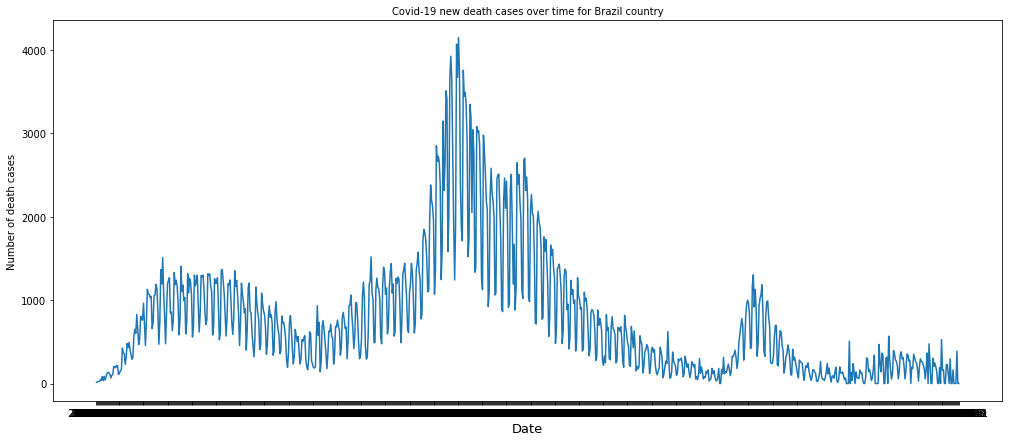

In [16]:
# Number of death cases over time for Brazil country ploting
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title(f"Covid-19 new death cases over time for {country} country", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

### Number of new death cases histogram for Brazil country

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

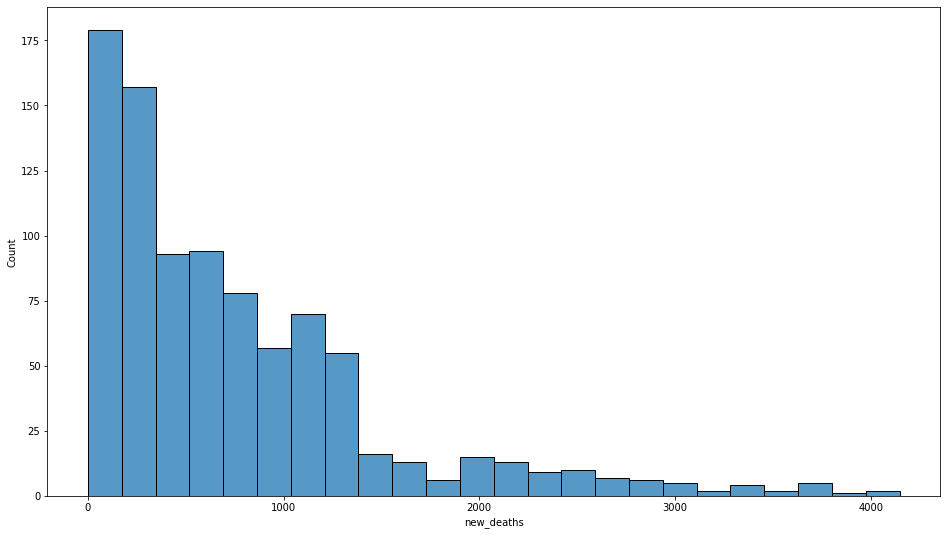

In [17]:
# Number of new death cases histogram for Brazil country ploting
plt.figure(figsize=(16,9))
sns.histplot(data_index['new_deaths'])

### Total of death cases over time for Brazil country

Text(0.5, 0, 'Date')

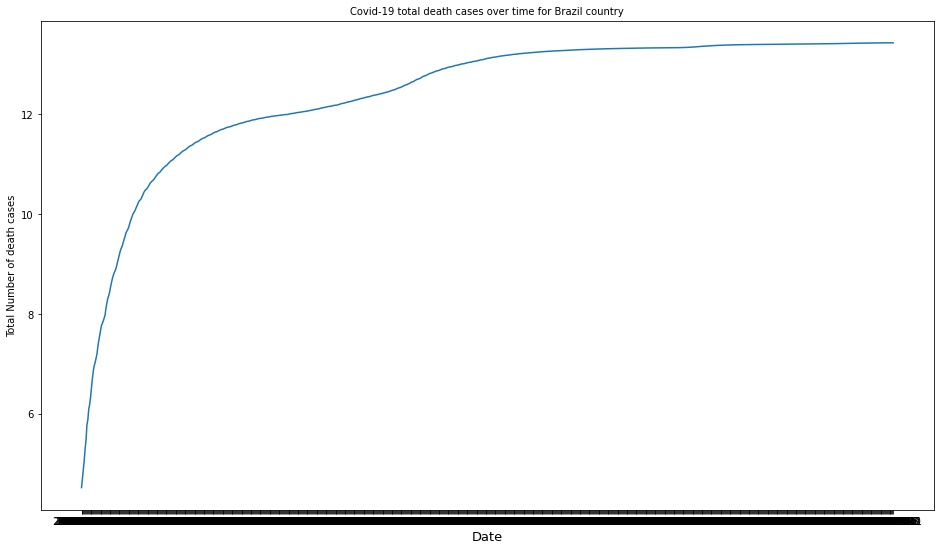

In [18]:
# Total of death cases over time for Brazil country ploting
fig, ax = plt.subplots(1, figsize=(16,9))
plt.plot(data_index.index,np.log(data_index['total_deaths']));
ax.set_title(f"Covid-19 total death cases over time for {country} country", size=10)
ax.set_ylabel("Total Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

###  `X` and `y` data splitting

In [19]:
### TBE
# X and y data splitting
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']
print('X.shape', X.shape, 'y.shape', y.shape)

X.shape (899, 19) y.shape (899,)


In [20]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,
2020-03-27,0.113093,0.148022,0.142755,3417.0,0.113386,0.0,0.0,0.0,0.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0,1.0
2020-03-28,0.113093,0.148022,0.142755,3904.0,0.113386,0.0,0.0,0.0,0.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0
2020-03-29,0.113093,0.148022,0.142755,4256.0,0.113386,0.0,0.0,0.0,0.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0
2020-03-30,0.113093,0.148022,0.142755,4579.0,0.113386,0.0,0.0,0.0,0.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0
2020-03-31,0.113093,0.148022,0.142755,5717.0,0.113386,0.0,0.0,0.0,0.0,159.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,0.000000,0.000000,0.000000,34477539.0,0.062191,470910315.0,186624508.0,171811546.0,117900233.0,684425.0,684425.0,684262.0,684262.0,684262.0,683965.0,683965.0,683851.0,683622.0,683397.0
2022-09-08,0.000000,0.000000,0.000000,34477539.0,0.062191,470943250.0,186632925.0,171821267.0,117915066.0,684425.0,684425.0,684425.0,684262.0,684262.0,684262.0,683965.0,683965.0,683851.0,683622.0
2022-09-09,0.000000,0.000000,0.000000,34516739.0,0.062191,471130593.0,186656503.0,171858625.0,118041839.0,684425.0,684425.0,684425.0,684425.0,684262.0,684262.0,684262.0,683965.0,683965.0,683851.0


In [21]:
y

date
2020-03-27        92.0
2020-03-28       111.0
2020-03-29       136.0
2020-03-30       159.0
2020-03-31       201.0
                ...   
2022-09-07    684425.0
2022-09-08    684425.0
2022-09-09    684813.0
2022-09-10    684813.0
2022-09-11    684813.0
Name: total_deaths, Length: 899, dtype: float64

### `X` data scaling

In [22]:
### To be engineering... 
# X data scaling
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

### Train & test set data splitting

In [23]:
### TBE
# X length
l_X = len(X)
# test length = 50
l_X_test = 50
# train length
l_X_train = l_X - l_X_test
# Train & test set data splitting
X_train = X[0:int(l_X_train)]
X_test=X[int(l_X_train):]
y_train=y[0:int(l_X_train)]
y_test=y[int(l_X_train):]
print('X_train.shape', X_train.shape, 'X_test.shape', X_test.shape, 'y_train.shape', y_train.shape,' y_test.shape',  y_test.shape)

X_train.shape (849, 19) X_test.shape (50, 19) y_train.shape (849,)  y_test.shape (50,)


## SVR with MAPE modeling

## SVR modeling

In [24]:
### TBE
# SVR model setting:
model = SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

### Grid searching

In [25]:
### TBE?
# Grid params:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
# CV params:
cv = 2 ; n_jobs = -1 ; verbose = 2
# Model grid search Cross Validation:
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
# grid search train fitting:
grid_search.fit(X_train,y_train)
# grid search best estimator finding:
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8,

###  Model train fitting

In [ ]:
### TBE
#  Model train fitting
model.fit(X_train,y_train)

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## SVR model predicting

In [ ]:
### TBE
# # SVR model predicting
y_pred=model.predict(X_test)

###  SVR model MAPE performance evaluating

In [ ]:
### TBE
#  SVR model MAPE performance evaluating
score=mean_absolute_percentage_error(y_test, y_pred)
score


0.0028014842427889035

In [ ]:

print('y_pred', y_pred)

y_pred [678915.93410635 676826.09160704 677146.82347095 677488.27987355
 677768.26172447 677971.76528889 678114.65408582 678318.0540638
 678441.90291232 678754.58141816 679045.51766438 679238.06811434
 679259.7455892  679418.49114269 679515.17328769 679859.38712716
 680150.70629657 680483.93733937 680418.70576561 680952.31502402
 680934.1611073  680968.76226986 681177.22103113 681396.15255213
 681003.95943666 682007.03388494 682218.91584325 682078.47056842
 682112.82692462 682322.29008383 682544.44438005 682485.17212069
 683047.22767681 683068.592888   683127.39396876 683203.6814611
 689348.6958406  689601.63717366 689975.8207959  690024.48870647
 689933.02099675 690182.46822584 690109.11788899 690290.0931468
 690547.58445251 690364.7728945  690377.56642276 690540.52148772
 690791.90438628 690665.82576859]


In [ ]:
with open(get_py_path("covid_ts_pred", "c_model", "ca_models", f'model_SVR_MAPE_{n_days}_{country}.pkl'),'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Total of death cases over time prediction for next 10 for Brazil country ploting
fig, ax = plt.subplots(1, figsize=(16, 9))
plt.plot(y_test.index[:30], y_pred[:30], color='r');
plt.plot(y_test.index[:30], y_test[:30]);
ax.set_title(f"Covid 19 total death cases over time prediction for the next {n_days} for {country} country", size=10)
ax.set_ylabel("Total Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

SyntaxError: invalid syntax (4112863126.py, line 4)